Origem do dataset:
https://www.kaggle.com/primaryobjects/voicegender

In [1]:
from os import listdir

In [2]:
listdir()

['.ipynb_checkpoints', 'Untitled.ipynb', 'voice.csv']

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Estudo do Dataset

In [4]:
df = pd.read_csv("voice.csv")

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


The Dataset

The following acoustic properties of each voice are measured and included within the CSV:

    meanfreq: mean frequency (in kHz)
    sd: standard deviation of frequency
    median: median frequency (in kHz)
    Q25: first quantile (in kHz)
    Q75: third quantile (in kHz)
    IQR: interquantile range (in kHz)
    skew: skewness (see note in specprop description)
    kurt: kurtosis (see note in specprop description)
    sp.ent: spectral entropy
    sfm: spectral flatness
    mode: mode frequency
    centroid: frequency centroid (see specprop)
    peakf: peak frequency (frequency with highest energy)
    meanfun: average of fundamental frequency measured across acoustic signal
    minfun: minimum fundamental frequency measured across acoustic signal
    maxfun: maximum fundamental frequency measured across acoustic signal
    meandom: average of dominant frequency measured across acoustic signal
    mindom: minimum of dominant frequency measured across acoustic signal
    maxdom: maximum of dominant frequency measured across acoustic signal
    dfrange: range of dominant frequency measured across acoustic signal
    modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
    label: male or female


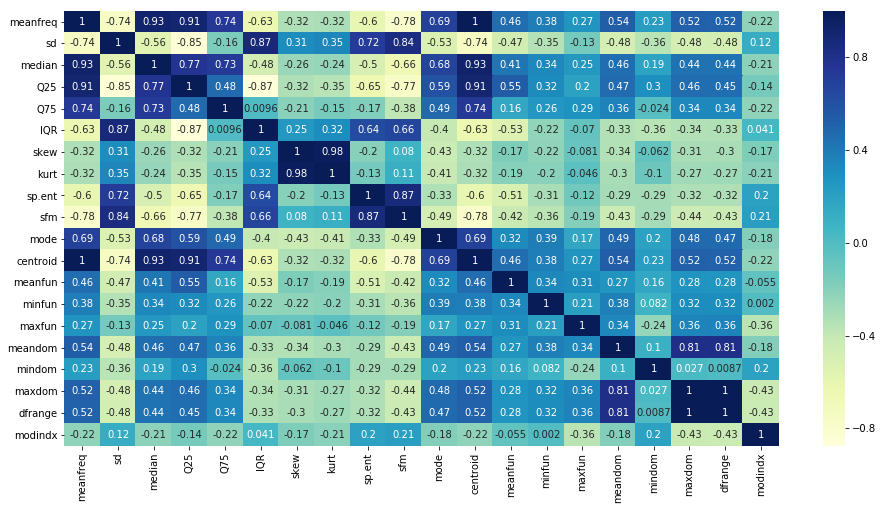

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),  cmap="YlGnBu", annot=True)

In [89]:
(df.corr()**2).sum()

meanfreq    8.187854
sd          6.820772
median      6.689273
Q25         7.741118
Q75         3.936427
IQR         5.525707
skew        3.182016
kurt        3.147831
sp.ent      5.051497
sfm         6.581771
mode        5.180931
centroid    8.187854
meanfun     3.501336
minfun      2.719279
maxfun      2.150284
meandom     4.882498
mindom      1.856614
maxdom      5.241892
dfrange     5.204361
modindx     1.984353
dtype: float64

In [99]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

### Distribuição por Label

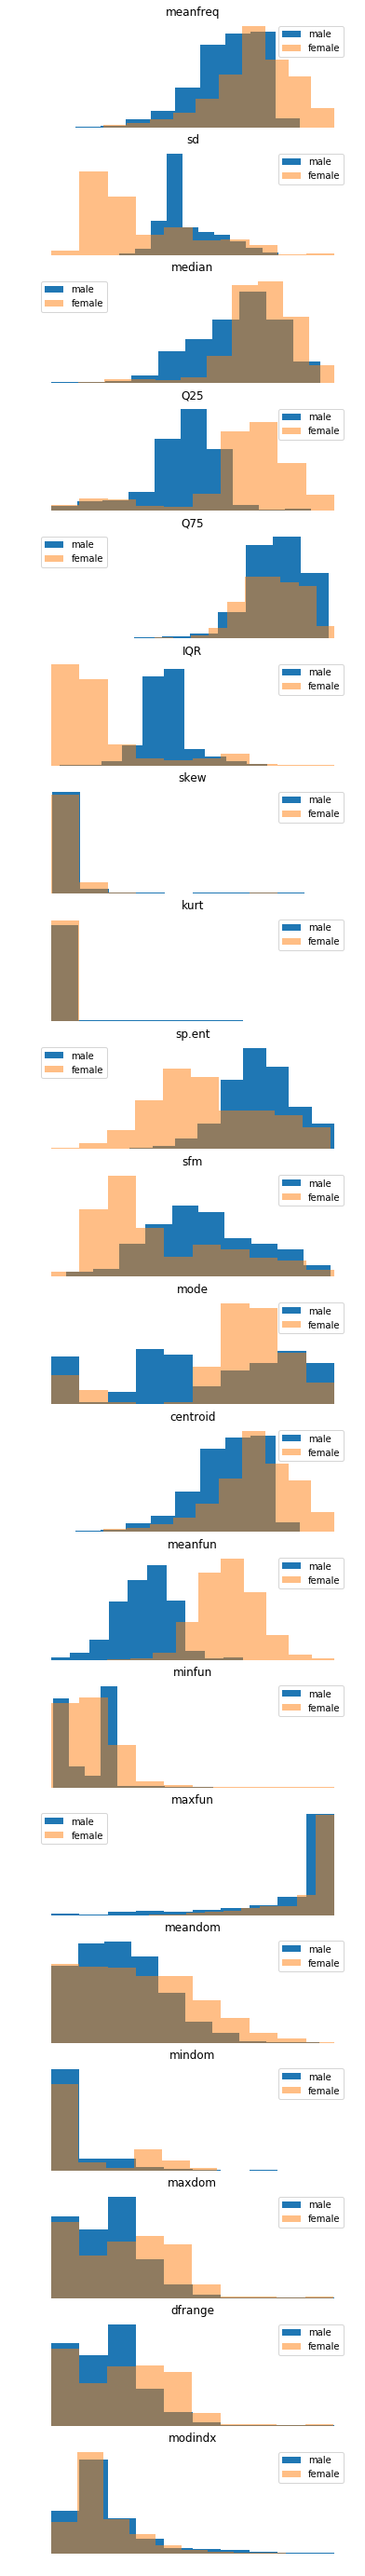

In [144]:
fig, ax = plt.subplots(20, figsize=(6,50))
cols = df.columns[:-1]
for i in range(20):
    ax[i].hist(df[df.label=='male'][cols[i]], label='male')
    ax[i].hist(df[df.label=='female'][cols[i]], label='female', alpha = 0.5)
    ax[i].set_title(cols[i])
    ax[i].axis('off')
    ax[i].legend()
    


In [105]:
g = sns.FacetGrid(df, col=df.columns[:-1], hue="label", palette="Set1")
g = (g.map(plt.hist, "vals", hist=False, rug=True))

ValueError: could not broadcast input array from shape (3168,20) into shape (3168)

### Divisão Feature-Label

In [26]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].apply(lambda x: 1 if x == 'male' else 0)

In [100]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [32]:
y.groupby(y).count()

label
0    1584
1    1584
Name: label, dtype: int64

#### Train Test Split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [98]:
dot_data = tree.export_graphviz(clf, out_file='graph.txt', 
                     feature_names=x.columns,  
                     class_names=['f','m'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

https://dreampuf.github.io/GraphvizOnline/#

In [90]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.1)

In [94]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
pred = clf.predict(x_test)

In [97]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       229
           1       0.95      0.93      0.94       247

   micro avg       0.94      0.94      0.94       476
   macro avg       0.94      0.94      0.94       476
weighted avg       0.94      0.94      0.94       476

